In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Optional: display all columns
pd.set_option('display.max_columns', None)

# Step 2: Load the Superstore dataset
df = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding='latin1')

# Step 3: Convert dates to datetime for time-based analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Step 4: View basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
#  Quick statistical summary for key numerical columns
df[['Sales', 'Profit', 'Discount', 'Quantity']].describe()


,Sales,Profit,Discount,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203,3.789574
std,623.245101,234.260108,0.206452,2.225110
min,0.444000,-6599.978000,0.000000,1.000000
25%,17.280000,1.728750,0.000000,2.000000
50%,54.490000,8.666500,0.200000,3.000000
75%,209.940000,29.364000,0.200000,5.000000
max,22638.480000,8399.976000,0.800000,14.000000


In [5]:
# Compute totals and profit margin
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Overall Profit Margin: {profit_margin:.2f}%")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Overall Profit Margin: 12.47%


# Insight

Total Sales: $2,297,200

Total Profit: $286,397

Profit Margin: ~12.5%
The business is profitable overall, but the margin leaves room for optimization.

# Sales by Product Category

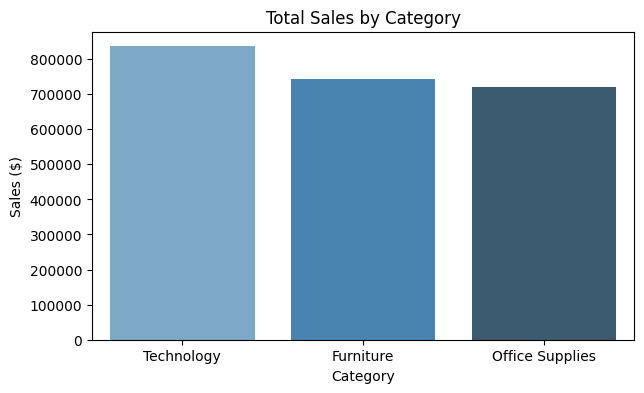

In [6]:
# Category-level aggregation
category_perf = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=category_perf.index, y=category_perf['Sales'], palette='Blues_d')
plt.title('Total Sales by Category')
plt.ylabel('Sales ($)')
plt.show()


# Regional Performance

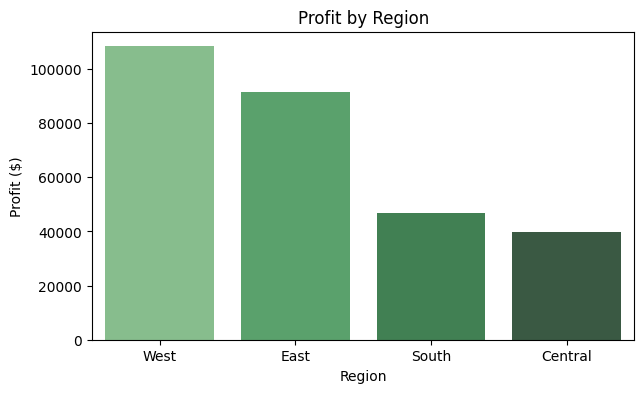

In [7]:
# Regional Sales and Profit comparison
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=region_perf.index, y=region_perf['Profit'], palette='Greens_d')
plt.title('Profit by Region')
plt.ylabel('Profit ($)')
plt.show()


# Customer Segment Analysis

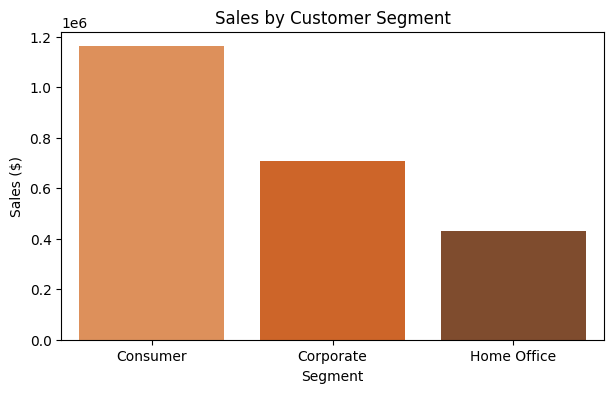

In [8]:
# Segment-wise aggregation
segment_perf = df.groupby('Segment')[['Sales', 'Profit']].sum()

plt.figure(figsize=(7,4))
sns.barplot(x=segment_perf.index, y=segment_perf['Sales'], palette='Oranges_d')
plt.title('Sales by Customer Segment')
plt.ylabel('Sales ($)')
plt.show()


# State-Level Performance

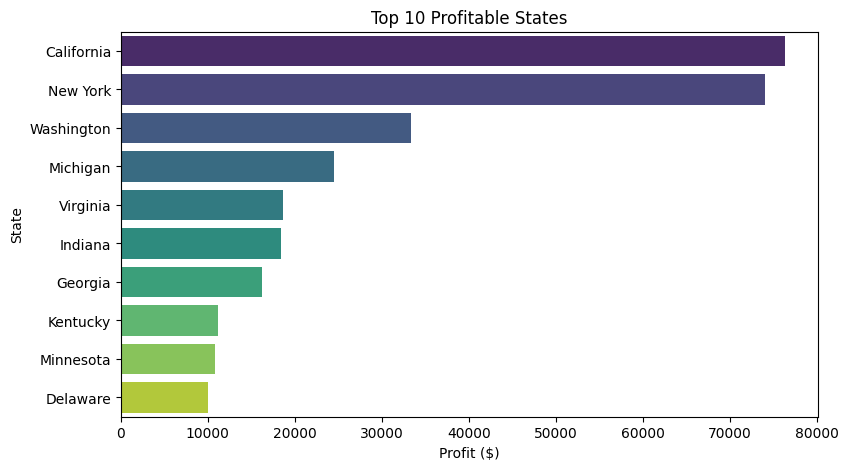

In [9]:
# Top 10 states by profit
top_states = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(9,5))
sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')
plt.title('Top 10 Profitable States')
plt.xlabel('Profit ($)')
plt.show()


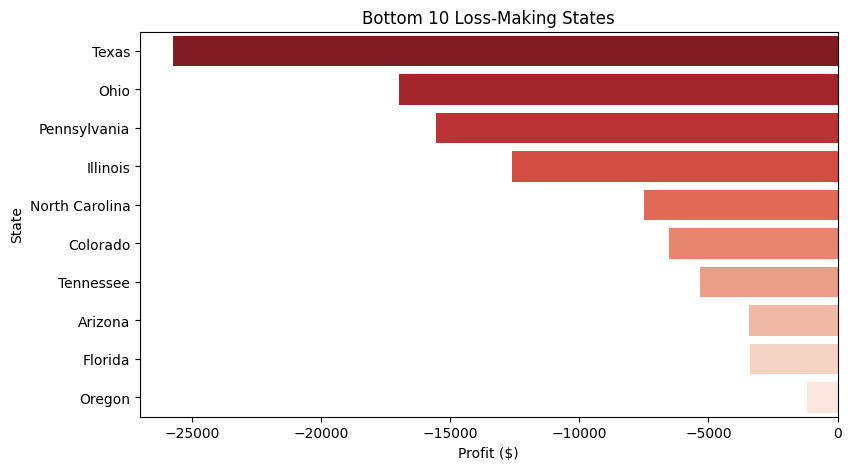

In [10]:
# Bottom 10 states by profit (loss-making)
bottom_states = df.groupby('State')['Profit'].sum().sort_values(ascending=True).head(10)
plt.figure(figsize=(9,5))
sns.barplot(x=bottom_states.values, y=bottom_states.index, palette='Reds_r')
plt.title('Bottom 10 Loss-Making States')
plt.xlabel('Profit ($)')
plt.show()


# Sub-Category Performance

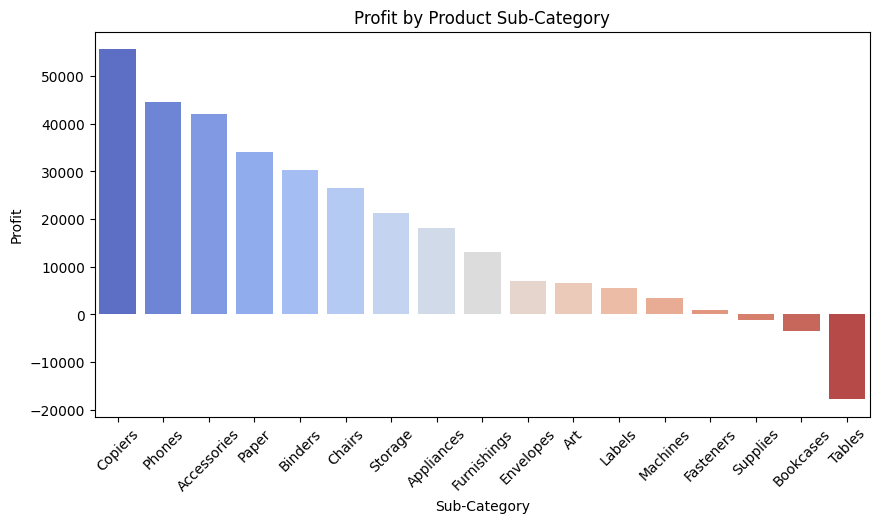

In [11]:
#  Sub-category profit and sales
sub_perf = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=sub_perf.index, y=sub_perf['Profit'], palette='coolwarm')
plt.title('Profit by Product Sub-Category')
plt.xticks(rotation=45)
plt.show()


# Discount vs Profit Relationship

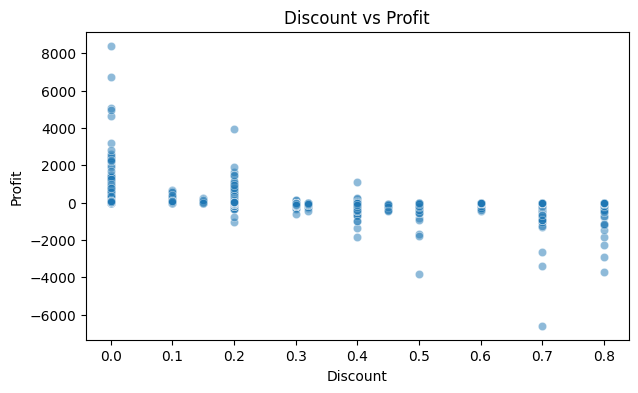

In [12]:
# Visualize discount impact on profit
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5)
plt.title('Discount vs Profit')
plt.show()


# Top & Bottom Products

In [13]:
# Top 10 products by profit
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

# Step 15: Bottom 10 products by profit
bottom_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=True).head(10)


In [14]:
top_products 

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64

In [15]:
bottom_products

Product Name
Cubify CubeX 3D Printer Double Head Print                           -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                           -4589.9730
Cubify CubeX 3D Printer Triple Head Print                           -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases            -2876.1156
Bush Advantage Collection Racetrack Conference Table                -1934.3976
GBC DocuBind P400 Electric Binding System                           -1878.1662
Cisco TelePresence System EX90 Videoconferencing Unit               -1811.0784
Martin Yale Chadless Opener Electric Letter Opener                  -1299.1836
Balt Solid Wood Round Tables                                        -1201.0581
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables   -1148.4375
Name: Profit, dtype: float64

# Monthly & Yearly Sales Trends

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


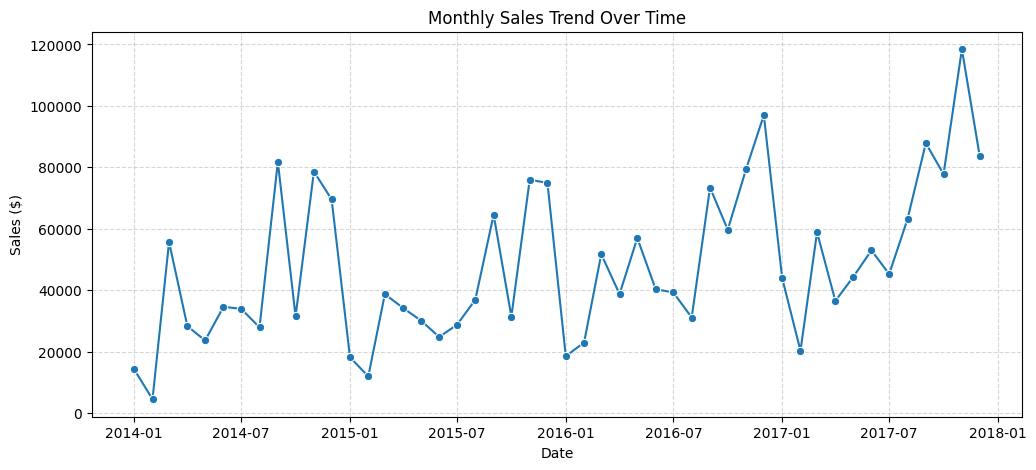

In [16]:
# Extract month and year from Order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

# Step 17: Group by Year and Month to view trends
monthly_trend = df.groupby(['Year', df['Order Date'].dt.to_period('M')])['Sales'].sum().reset_index()
monthly_trend['Order Date'] = monthly_trend['Order Date'].dt.to_timestamp()

# Step 18: Plot monthly sales trend
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_trend, x='Order Date', y='Sales', marker='o')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Year-Over-Year Profit Trend

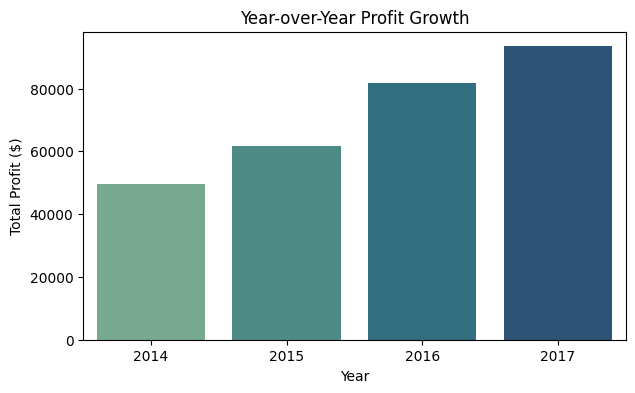

In [17]:
# Compute total profit by year
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()

# Step 20: Plot yearly profit growth
plt.figure(figsize=(7,4))
sns.barplot(data=yearly_profit, x='Year', y='Profit', palette='crest')
plt.title('Year-over-Year Profit Growth')
plt.ylabel('Total Profit ($)')
plt.show()


# Shipping Time Analysis

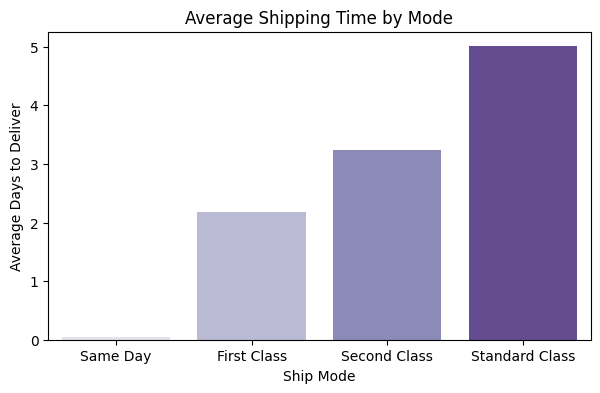

In [18]:
# Calculate shipping delay in days
df['Ship Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

# Step 22: Average shipping delay per Ship Mode
shipping_perf = df.groupby('Ship Mode')['Ship Delay'].mean().sort_values()

plt.figure(figsize=(7,4))
sns.barplot(x=shipping_perf.index, y=shipping_perf.values, palette='Purples')
plt.title('Average Shipping Time by Mode')
plt.ylabel('Average Days to Deliver')
plt.show()


# Correlation Heatmap (Numerical Insights)

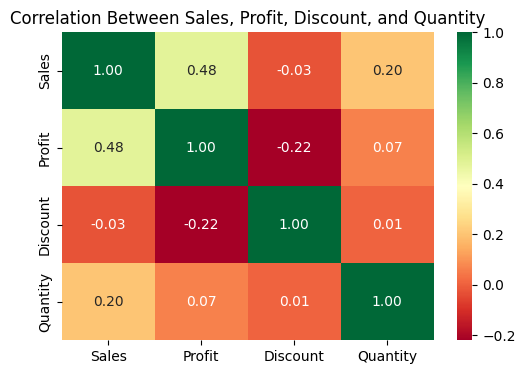

In [19]:
# Check correlation among key numerical columns
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Correlation Between Sales, Profit, Discount, and Quantity')
plt.show()
